Prueba de obtener en base a una matriz de adyacencia el diccionario correspondiente.

In [13]:
import numpy as np
renglon = []
with open('ejemplo1.txt','r') as ejemplo1:
    for linea in ejemplo1:
        renglon.append(linea.split( ))

for item in renglon:
    for subitem in range(len(item)):
        item[subitem] = float(item[subitem])
caminos = { }
for i in range(len(renglon)):
    for j in range(len(renglon)):
        if renglon[i][j] != 0:
                caminos.update({(i,j): renglon[i][j]})
print(caminos)

{(0, 1): 2.0, (0, 2): 5.0, (0, 3): 4.0, (1, 0): 2.0, (1, 2): 2.0, (1, 4): 7.0, (2, 0): 5.0, (2, 1): 2.0, (2, 3): 1.0, (2, 4): 4.0, (2, 5): 3.0, (3, 0): 4.0, (3, 2): 1.0, (3, 5): 4.0, (4, 1): 7.0, (4, 2): 4.0, (4, 5): 1.0, (4, 6): 5.0, (5, 2): 3.0, (5, 3): 4.0, (5, 4): 1.0, (5, 6): 7.0, (6, 4): 5.0, (6, 5): 7.0}


Prueba para generar una matriz aleatoria de una red no dirigida n*n con numpy

In [14]:
import numpy as np
array = np.random.randint(50, size = (10,10))
for i in range(len(array[0])):
    for j in range(len(array[0])):
        if i == j:
            array[i,j] = 0
        array[i,j] = array[j,i]
print(array)

[[ 0 24 11 45 33 23  4  0  8  7]
 [24  0 47 49  4 16 10 44 13 31]
 [11 47  0 11 34 14 33 45 21  0]
 [45 49 11  0 43 46 38 14 27 33]
 [33  4 34 43  0 21 47  0 17 35]
 [23 16 14 46 21  0 24  2 29 40]
 [ 4 10 33 38 47 24  0 26 30 48]
 [ 0 44 45 14  0  2 26  0 18  9]
 [ 8 13 21 27 17 29 30 18  0  5]
 [ 7 31  0 33 35 40 48  9  5  0]]


prueba de diccionarios

In [15]:
caminos = {'a': {'pred' : ['f']}}
caminos['a']['pred'] = list(caminos['a']['pred']) + ['g']
print(caminos)

{'a': {'pred': ['f', 'g']}}


escribir la matriz adyacente en un archivo txt

In [16]:
with open('ejemplo3.txt','w') as file:
    for i in array:
        for j in i:
            file.write("%f " %j)
        file.write("\n")

Crear gráficos a partir de lista de adyacencias

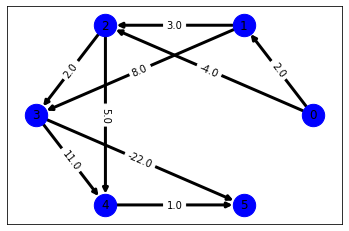

In [51]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
renglon = []
with open('ejemplo3.txt','r') as ejemplo1:
    for line in ejemplo1:
        lista = []
        for x in line.split():
            lista.append(float(x))
        renglon.append(lista)
matriz = np.array(renglon)

G = nx.from_numpy_matrix(matriz)
options = {
    'node_color': 'blue',
    'node_size': 500,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
# pos = nx.get_node_attributes(G,'pos')
# cambiar planar por circular o random
pos = nx.circular_layout(G, center=None, dim=2)
# valores de los caminos
labels = nx.get_edge_attributes(G, 'weight')
# dibujar caminos y nodos
# TODO pone los nombres de los nodos.
nx.draw_networkx(G, pos, arrows=True, **options, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.savefig("ejemplo3.eps")